In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!gdown --id 193W30cPuRl3QlS2N5NZQZ3DGMIUnt1bn

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=193W30cPuRl3QlS2N5NZQZ3DGMIUnt1bn
To: /kaggle/working/customer_behavior_analytcis.csv
100%|██████████████████████████████████████| 33.6k/33.6k [00:00<00:00, 49.5MB/s]


In [43]:
df = pd.read_csv('/kaggle/working/customer_behavior_analytcis.csv')

In [44]:
df

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004
...,...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0,CM00994
995,5.0,68.36,75.41,43.0,1.0,CM00995
996,18.0,19.53,28.77,18.0,8.0,CM00996
997,4.0,28.97,72.27,57.0,3.0,CM00997


| Customer Type      | Total Purchases | Avg. Cart Value | Time Spent | Product Click | Discount Usage |
|-------------------|----------------|----------------|------------|---------------|---------------|
| **Bargain Hunters** | High | Low | Moderate | Moderate | High |
| **High Spenders** | Moderate | High | Moderate | Moderate | Low |
| **Window Shoppers** | Low | Moderate | High | High | Low |

In [45]:
# Check for missing values
print(df.isnull().sum())

total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64


In [46]:
for col in df.columns:
    if col != 'customer_id':  # Skip 'customer_id' itself
        missing_customers = df.loc[df[col].isnull(), 'customer_id']
        print(col)
        print([i[-3:] for i in missing_customers.to_list()])
        print("-" * 40)

total_purchases
['097', '139', '212', '253', '294', '310', '317', '353', '409', '425', '549', '555', '605', '622', '674', '765', '920', '924', '936', '986']
----------------------------------------
avg_cart_value
['097', '139', '212', '253', '294', '310', '317', '353', '409', '425', '549', '555', '605', '622', '674', '765', '920', '924', '936', '986']
----------------------------------------
total_time_spent
[]
----------------------------------------
product_click
['097', '139', '212', '253', '294', '310', '317', '353', '409', '425', '549', '555', '605', '622', '674', '765', '920', '924', '936', '986']
----------------------------------------
discount_counts
[]
----------------------------------------


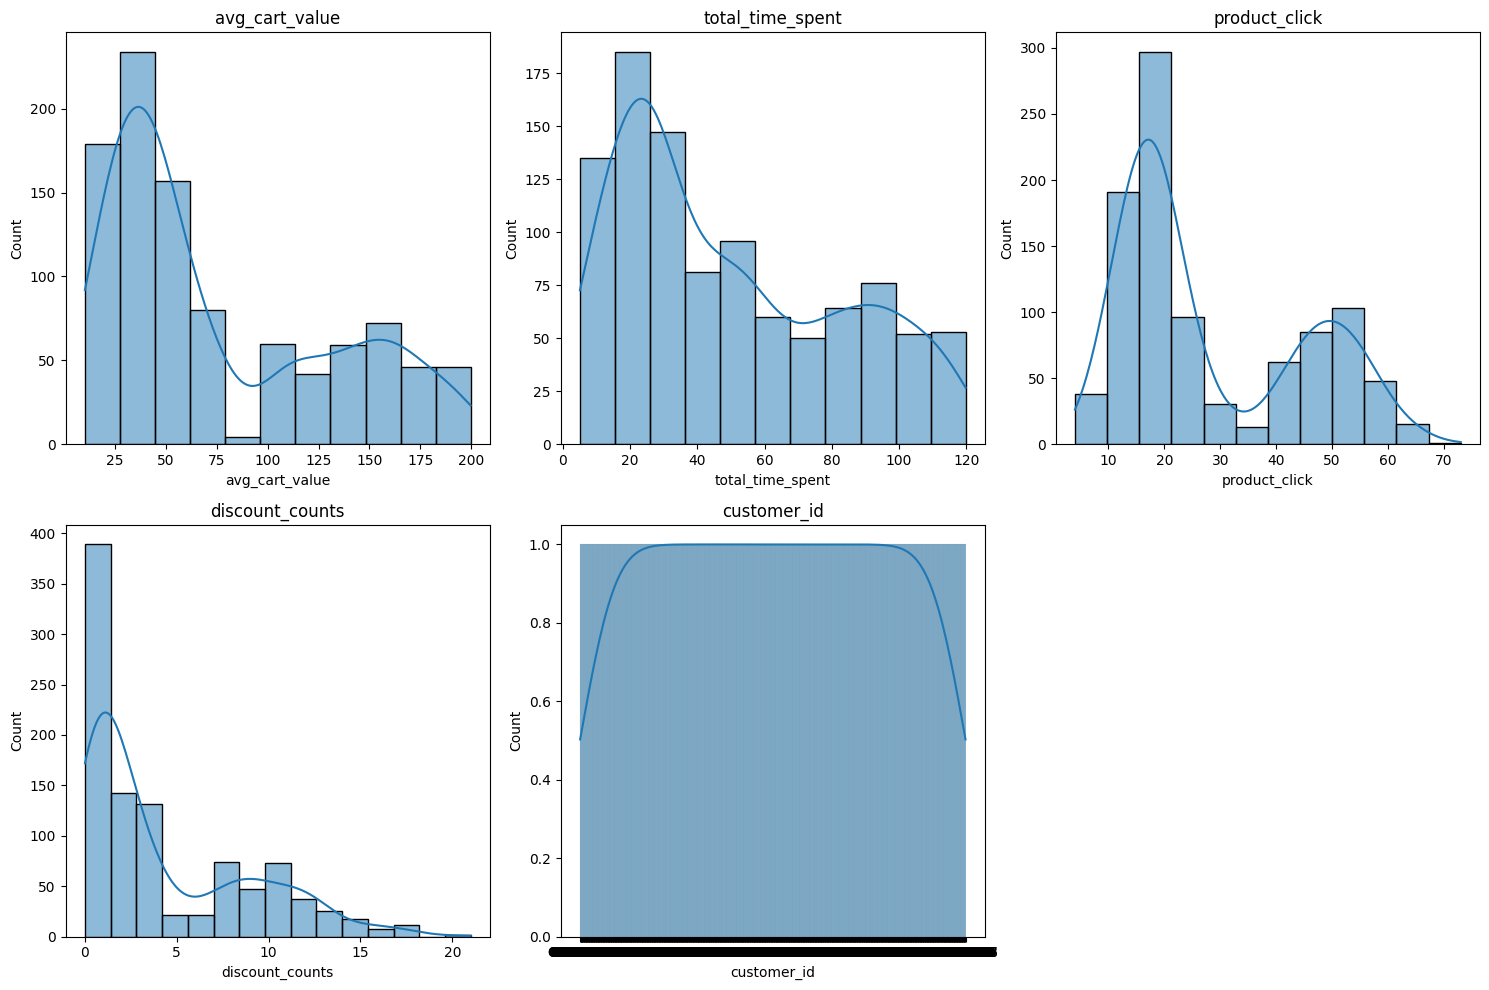

In [47]:
# Plot distributions of each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

In [49]:
df = df.drop('customer_id', axis=1)

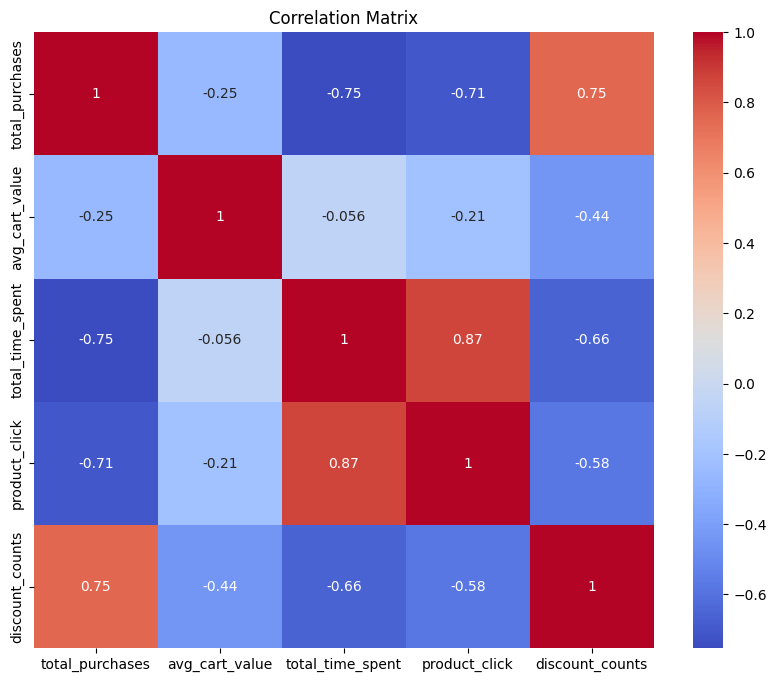

In [20]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [38]:
df_drop = df.dropna()

In [29]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_drop.iloc[:, :])

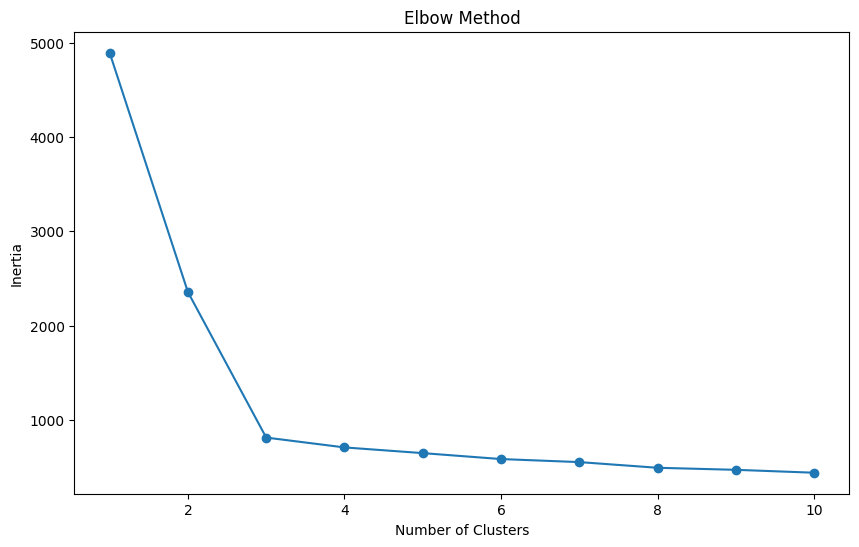

In [35]:
# Use the Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

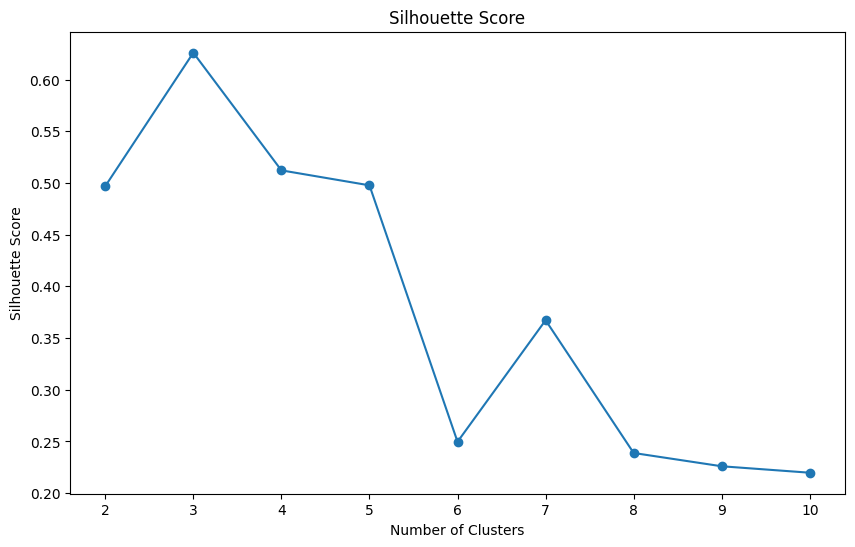

In [36]:
# Calculate Silhouette Score for different numbers of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [39]:
# Train the KMeans model with the optimal number of clusters
optimal_k = 3  # Based on the Elbow Method and Silhouette Score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the original dataframe
df_drop['cluster'] = kmeans.labels_

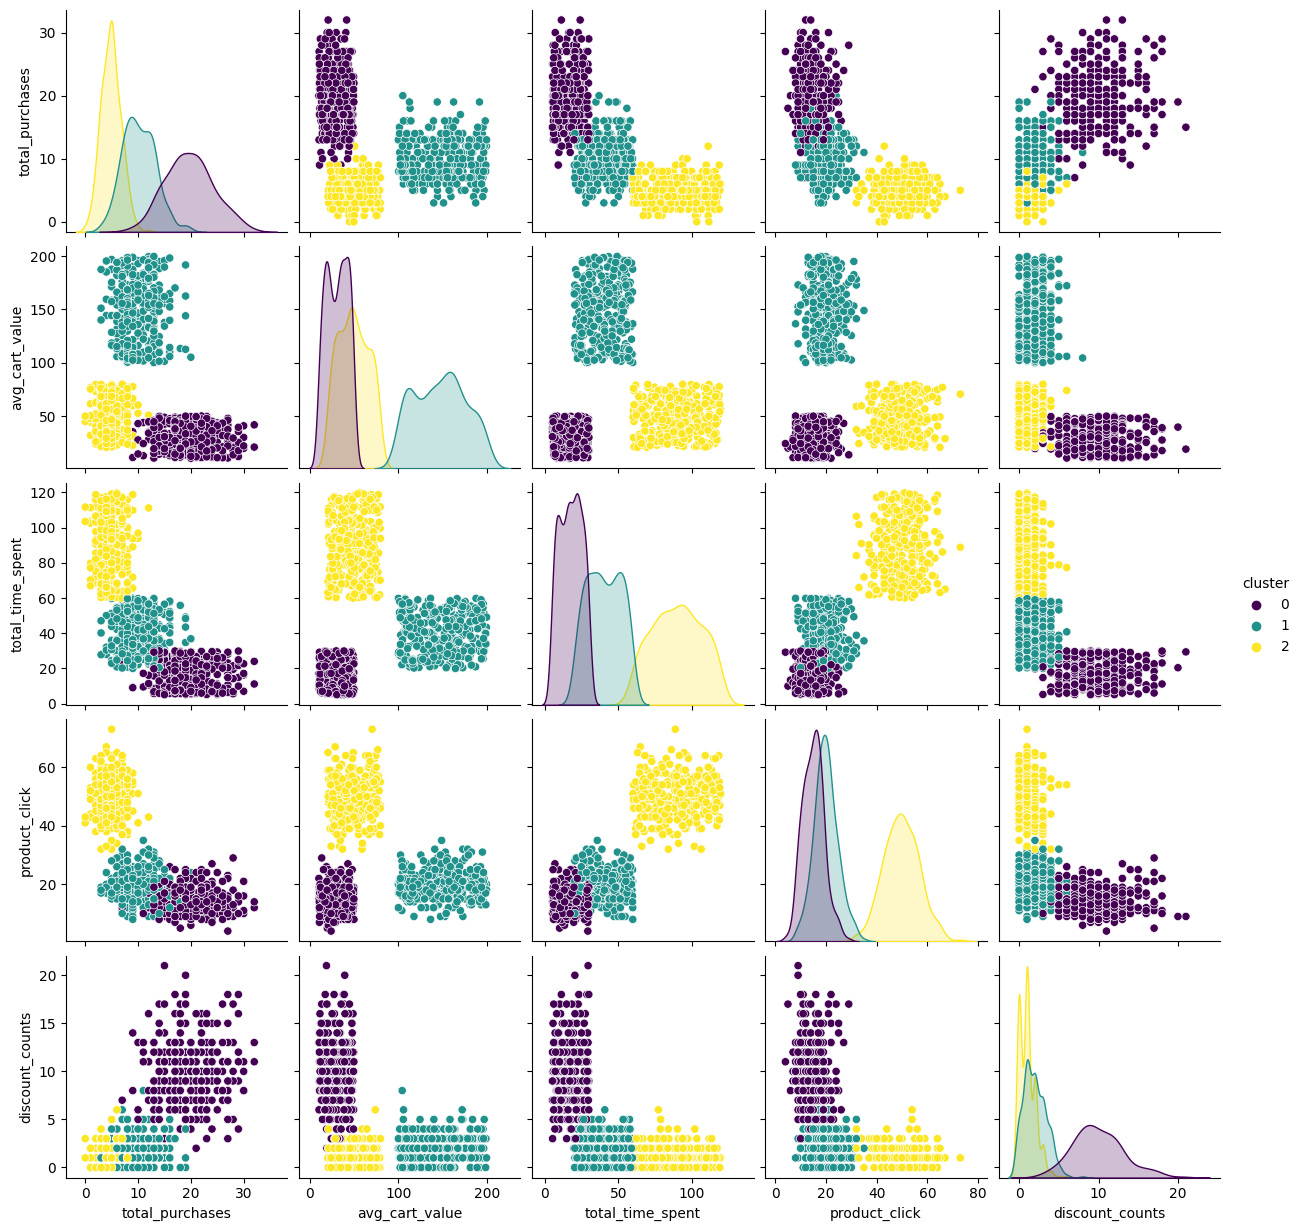

In [40]:
# Visualize the clusters using pairplot
sns.pairplot(df_drop, hue='cluster', palette='viridis')
plt.show()

0 Purple - Bargain Hunters  
1 Cyan - High Spenders  
2 Yellow - Window Shoppers

In [42]:
# Analyze the characteristics of each cluster
cluster_analysis = df_drop.groupby('cluster').mean()
print(cluster_analysis)

         total_purchases  avg_cart_value  total_time_spent  product_click  \
cluster                                                                     
0              19.711656       30.399509         17.453988      14.944785   
1              10.175385      147.327169         40.284369      19.895385   
2               4.862805       49.029848         90.114726      49.716463   

         discount_counts  
cluster                   
0               9.938650  
1               1.972308  
2               1.030488  


In [57]:
df_null = df[df.isna().any(axis=1)]
df_null = df_null.fillna(0)

scaled_null = scaler.transform(df_null)
predict_null = kmeans.predict(scaled_null)

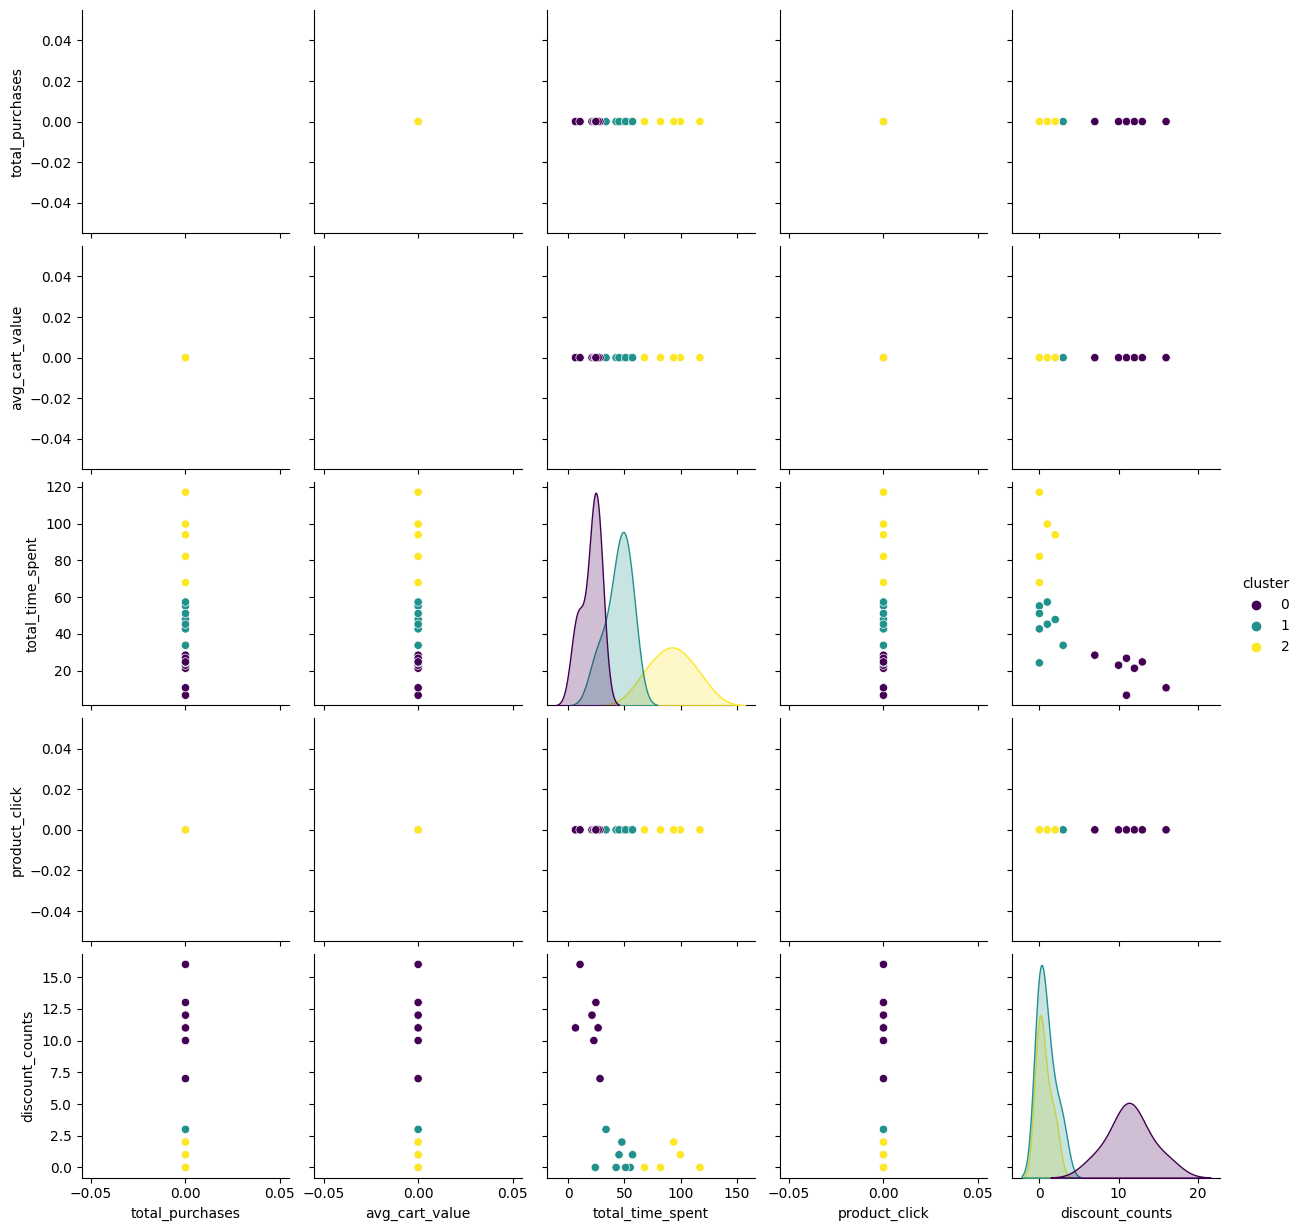

In [63]:
df_null['cluster'] = predict_null

# Visualize the clusters using pairplot
sns.pairplot(df_null, hue='cluster', palette='viridis')
plt.show()

In [ ]:
# from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

# model_gmm = GaussianMixture(n_components=3, random_state=0)
# preds_gmm = model_gmm.fit_predict(scaled_features)

In [ ]:
# model_bgmm = BayesianGaussianMixture(n_components=3, covariance_type='full', max_iter=100, n_init=5, init_params='random', random_state=0)
# preds_bgmm = model_bgmm.fit_predict(scaled_features)

In [65]:
df_final = pd.concat([df_drop, df_null]).sort_index()

In [67]:
df_final.to_csv('df_final.csv', index=False)
df_final['cluster'].to_csv('predictions.csv', index=False)